# Understanding the Problem Statement:
The goal is to predict whether a given molecule is active (1) or inactive (0) by using data-driven techniques, specifically binary classification models. In drug discovery, identifying whether a molecule binds to a specific receptor is a crucial step since binding generally indicates the molecule may be a good candidate for a drug.

## Overview and Assignment Goals
The objectives of this assignment are the following: 

* Use/implement a feature selection/reduction technique.
* Experiment with various classification models.
* Think about dealing with imbalanced data.
* Use F1 Scoring Metric

#### The dataset has an imbalanced distribution i.e., within the training set there are only 78 actives (+1) and 722 inactives (0). No information is provided for the test set regarding the distribution.

## Data Description

The training dataset consists of 800 records and the test dataset consists of 350 records. We provide you with the training class labels and the test labels are held out. The attributes are binary type and as such are presented in a sparse matrix format within train.dat and test.dat

**Train data:** Training set (a sparse binary matrix, patterns in lines, features in columns: the index of the non-zero features are provided with class label 1 or 0 in the first column).

**Test data:** Testing set (a sparse binary matrix, patterns in lines, features in columns: the index of non-zero features are provided).

**Format example:** A sample submission with 350 entries randomly chosen to be 0 or 1.

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math

In [2]:
# Initialize a list to store the processed data
data = []
with open("train_data.txt", 'r') as file:
    for line in file:
        # Skip empty lines
        if line.strip():
            # Replace any tabs with spaces and remove the trailing newline
            clean_line = re.sub(r'\t+', ' ', line).strip()

            # Extract the label (first character as an integer)
            label = int(clean_line[0])

            # Extract the features (rest of the line as a list of integers)
            features = [int(f) for f in clean_line[2:].strip().split()]

            # Append the label and features as a tuple to the data list 
            data.append((label, features))

In [3]:
# # Print the processed data to verify
# print(data[0])

In [4]:
max_length = max(len(features) for _, features in data)

# Pad each feature list to the same length with zeros
X = [features + [0] * (max_length - len(features)) for _, features in data]
y = [label for label, _ in data]

In [46]:
def apply_smote_and_scaling(X, y):
    """
    Apply SMOTE to handle class imbalance and standardize the features.
    
    Parameters:
    - X: List or array-like, feature matrix.
    - y: List or array-like, class labels.

    Returns:
    - X_scaled: Scaled feature matrix after applying SMOTE.
    - y_resampled: Resampled class labels.
    """
    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print(f"Original dataset size: {len(y)}")
    print(f"Resampled dataset size: {len(y_resampled)}")

    # Standardize the resampled data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_resampled)

    return X_scaled, y_resampled

In [47]:
def apply_pca(X, n_components=10):
    """
    Apply PCA to reduce the dimensionality of the feature matrix.

    Parameters:
    - X: Scaled feature matrix.
    - n_components: Number of principal components to keep.

    Returns:
    - X_pca: Feature matrix transformed with PCA.
    """
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    print(f"Original shape: {np.array(X).shape}")
    print(f"Transformed shape after PCA: {X_pca.shape}")

    return X_pca

In [50]:
X_scaled, y_resampled = apply_smote_and_scaling(X, y)  # SMOTE + Scaling

# Now apply PCA on the scaled data
X_pca = apply_pca(X_scaled, n_components=10) 

Original dataset size: 800
Resampled dataset size: 1444
Original shape: (1444, 5524)
Transformed shape after PCA: (1444, 10)


In [67]:
 print(X_pca[0], X[0])

[-17.5419025   17.38961821  14.61090672  -3.14487021   7.00768512
  -7.61589003   4.83356008  -4.45498751  -3.43370548  -0.88359672] [96, 183, 367, 379, 387, 1041, 1117, 1176, 1327, 1546, 1862, 2068, 2357, 2369, 2389, 2904, 3171, 3172, 3221, 3269, 3341, 3596, 3794, 3832, 3888, 3892, 4093, 4128, 4143, 4265, 4319, 4436, 4782, 5002, 5060, 5203, 5296, 5710, 5783, 5841, 6163, 6356, 6499, 6950, 7221, 7286, 7411, 7510, 7539, 7626, 7788, 7904, 7982, 8057, 9007, 9188, 9350, 9427, 9589, 9680, 9700, 9873, 9900, 9953, 10118, 10141, 10276, 10295, 10469, 10489, 10506, 10575, 10690, 10880, 10944, 11599, 11835, 12138, 12208, 12335, 12533, 12535, 12786, 12836, 12907, 12930, 12956, 13028, 13161, 13611, 13650, 13682, 13985, 14252, 14256, 14403, 14435, 14477, 14621, 14652, 14941, 15141, 15170, 15196, 15422, 15742, 15867, 15869, 16021, 16391, 16465, 16487, 16628, 16631, 16643, 16870, 17077, 17349, 17389, 17616, 17717, 17740, 18175, 18270, 18357, 18645, 18770, 18922, 18960, 18976, 19102, 19199, 19449, 19470

In [8]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_resampled, test_size=0.2, random_state=42
)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
y_pred_NB = clf_NB.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred_NB)
print(f"F1-Score: {f1}")
print(f"F1-Score: {f1_2}")

F1-Score: 0.7702702702702702
F1-Score: 0.26666666666666666


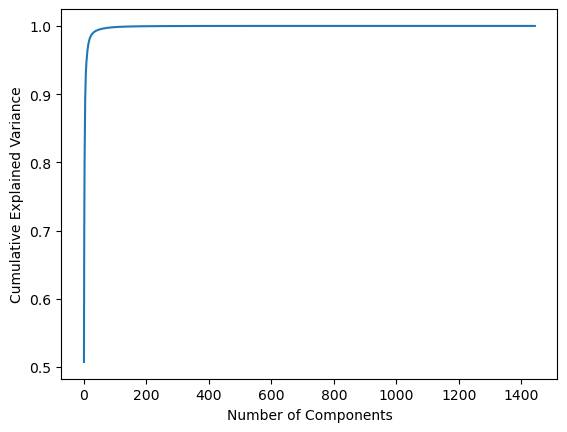

In [9]:
import matplotlib.pyplot as plt

pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [10]:
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index  # Index of the feature to split on
            self.threshold = threshold  # Value of the split
            self.left = left  # Left child node
            self.right = right  # Right child node
            self.value = value  # Value (class label) for leaf nodes

    def _gini(self, y):
        """Calculate the Gini impurity for a list of labels."""
        unique, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def _best_split(self, X, y):
        """Find the best feature and threshold to split the data."""
        best_gini = float('inf')
        best_split = None

        for feature_index in range(len(X[0])):  # Loop through all features
            thresholds = np.unique([x[feature_index] for x in X])  # Unique values for the feature
            for threshold in thresholds:
                # Split the data based on the threshold
                left_indices = [i for i in range(len(X)) if X[i][feature_index] < threshold]
                right_indices = [i for i in range(len(X)) if X[i][feature_index] >= threshold]

                if not left_indices or not right_indices:
                    continue  # Skip if one side is empty

                # Calculate Gini impurity for the split
                left_gini = self._gini([y[i] for i in left_indices])
                right_gini = self._gini([y[i] for i in right_indices])
                gini_split = (len(left_indices) / len(X)) * left_gini + \
                             (len(right_indices) / len(X)) * right_gini

                if gini_split < best_gini:
                    best_gini = gini_split
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }
        return best_split

    def _build_tree(self, X, y, depth=0):
        """Recursively build the decision tree."""
        if len(set(y)) == 1:  # If all labels are the same, return a leaf node
            return self.Node(value=y[0])

        if depth >= self.max_depth:  # If max depth reached, return the majority class
            majority_class = max(set(y), key=y.count)
            return self.Node(value=majority_class)

        # Find the best split
        split = self._best_split(X, y)
        if not split:  # If no valid split, return a leaf node
            majority_class = max(set(y), key=y.count)
            return self.Node(value=majority_class)

        # Recursively build the left and right subtrees
        left = self._build_tree([X[i] for i in split['left_indices']],
                                [y[i] for i in split['left_indices']], depth + 1)
        right = self._build_tree([X[i] for i in split['right_indices']],
                                 [y[i] for i in split['right_indices']], depth + 1)

        return self.Node(feature_index=split['feature_index'], threshold=split['threshold'],
                         left=left, right=right)

    def fit(self, X, y):
        """Fit the decision tree to the data."""
        self.tree = self._build_tree(X, y)

    def _predict(self, node, x):
        """Recursively predict the class for a single sample."""
        if node.value is not None:
            return node.value

        if x[node.feature_index] < node.threshold:
            return self._predict(node.left, x)
        else:
            return self._predict(node.right, x)

    def predict(self, X):
        """Predict the class for multiple samples."""
        return [self._predict(self.tree, x) for x in X]

In [11]:
class NaiveBayes:
    def __init__(self):
        self.classes = None  # Unique class labels
        self.mean = {}  # Mean of each feature for each class
        self.variance = {}  # Variance of each feature for each class
        self.priors = {}  # Prior probabilities for each class

    def fit(self, X, y):
        """Fit the model to the training data."""
        self.classes = np.unique(y)  # Find the unique class labels

        # Calculate mean, variance, and prior for each class
        for cls in self.classes:
            X_cls = np.array([X[i] for i in range(len(X)) if y[i] == cls])
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.variance[cls] = np.var(X_cls, axis=0) + 1e-6  # Add a small value to avoid division by zero
            self.priors[cls] = X_cls.shape[0] / len(X)

    def _gaussian_pdf(self, x, mean, var):
        """Calculate the Gaussian probability density function."""
        exponent = math.exp(-((x - mean) ** 2) / (2 * var))
        return (1 / math.sqrt(2 * math.pi * var)) * exponent

    def predict(self, X):
        """Predict the class labels for the given data."""
        predictions = []
        for x in X:
            posteriors = {}
            # Calculate posterior for each class
            for cls in self.classes:
                # Start with the log prior
                posteriors[cls] = math.log(self.priors[cls])

                # Add the log likelihoods for all features
                for i in range(len(x)):
                    mean = self.mean[cls][i]
                    var = self.variance[cls][i]
                    posteriors[cls] += math.log(self._gaussian_pdf(x[i], mean, var))

            # Predict the class with the highest posterior
            predictions.append(max(posteriors, key=posteriors.get))
        return predictions

In [12]:
np.random.seed(42)
tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)

In [13]:
np.random.seed(42)
naive = NaiveBayes()
naive.fit(X_train, y_train)

In [14]:
np.random.seed(42)
naive_predicitions = naive.predict(X_test)
print("Predictions:", naive_predicitions)

Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [42]:
np.random.seed(42)
predictions = tree.predict(X_test)  # Predict the first 5 samples
print("Predictions:", predictions)

Predictions: [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]


In [16]:
f1_DT = f1_score(y_test, predictions)
f1_NB = f1_score(y_test, naive_predicitions)
print(f"F1-Score (Decision Tree): {f1_DT}")
print(f"F1-Score(Naive Bayes): {f1_NB}")

F1-Score (Decision Tree): 0.6530612244897959
F1-Score(Naive Bayes): 0.26666666666666666


### Now lets feed the real Test data(Unseen data) and store the prediction in a different file.

In [38]:
test_data = []
with open("test_data.txt", 'r') as file:
    for line in file:
        if line.strip():
            clean_line = re.sub(r'\t+', ' ', line).strip()
            ready_data = [int(f) for f in clean_line.split()]
            test_data.append(ready_data)
print(len(test_data))

350


In [61]:
max_length = max(len(row) for row in test_data)
test_data_padded = [row + [0] * (max_length - len(row)) for row in test_data]

In [62]:
test_pca = apply_pca(test_data_padded, n_components=10)

Original shape: (350, 6061)
Transformed shape after PCA: (350, 10)


In [68]:
print(test_pca[1])

[ 477132.59928655 -519887.53628364  213001.61946168  151862.71279515
 -271556.04626868  -50692.39746709  173648.36820028 -184748.32235397
    9524.24611735   70968.39221123]


In [69]:
test_data_prediction_DT = tree.predict(test_pca) 
print("Predictions:", test_data_prediction_DT)

Predictions: [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [70]:
format_file = "Format.txt"
with open(format_file, 'w+') as file:
    for prediction in test_data_prediction_DT:
        file.write(str(prediction) + '\n')